In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [14]:
folder_path = "../../data/output/WattsStrogatzGraphs/"
files=os.listdir(folder_path)
p=10 #Define p incase for WattsStrogatz Graphs
data0=[]
data10=[]
data20=[]
data30=[]
data40=[]
data50=[]
data60=[]
data70=[]
data80=[]
data90=[]
data100=[]

for file in files:
    if os.path.isfile(folder_path+"/"+file):
        with open(os.path.join(folder_path, file), 'r') as f:
            content = pd.read_csv(folder_path+"/"+file, names=['Epoch', 'Pop', 'Frac', 'DiscEdge'], skiprows=1, sep=" ")
            file=file.split('_')
            pfile=file[2]
            pfile=pfile[1:]
            #print(pfile)
            if int(p)!=int(pfile):
                continue
            #print(file)
            content=content.drop(['Epoch', 'Pop'], axis=1)    
            last_row_content=content.iloc[-1, 0]
            if last_row_content>0.5:
                last_row_content=1-last_row_content
            if file[4]=='r0':
                data0.append(float(last_row_content))
            elif file[4]=='r10':
                data10.append(float(last_row_content))
            elif file[4]=='r20':
                data20.append(float(last_row_content))
            elif file[4]=='r30':
                data30.append(float(last_row_content))
            elif file[4]=='r40':
                data40.append(float(last_row_content))
            elif file[4]=='r50':
                data50.append(float(last_row_content))
            elif file[4]=='r60':
                data60.append(float(last_row_content))
            elif file[4]=='r70':
                data70.append(float(last_row_content))
            elif file[4]=='r80':
                data80.append(float(last_row_content))
            elif file[4]=='r90':
                data90.append(float(last_row_content))
            elif file[4]=='r100':
                data100.append(float(last_row_content))

my_dict={'0.0':data0, '0.1':data10, '0.2':data20, '0.3':data30, '0.4':data40, '0.5':data50, '0.6':data60, '0.7':data70, '0.8':data80, '0.9':data90, '1.0':data100}
print(my_dict)

['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r100', '1941.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r60', '22.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r80', '8462.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r20', '3838.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r0', '5024.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r90', '9153.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r30', '6900.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r50', '9755.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r60', '5477.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r70', '7812.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r50', '1562.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r40', '8501.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r60', '9428.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r20', '3364.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10', 'r80', '7231.txt']
['newWattsStrogatz', 'N50000', 'p10', 'k10

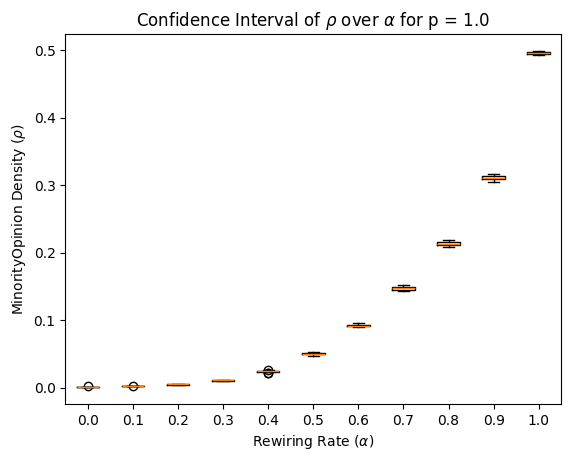

In [12]:
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
ax.set_xlabel("Rewiring Rate ($\\alpha$)")
ax.set_ylabel("MinorityOpinion Density ($\\rho$)")
plt.title("Confidence Interval of $\\rho$ over $\\alpha$ for p = "+str(int(p)/10))
plt.show()

In [13]:
fig.savefig("../../figures/WattsStrogatz/Box Plot p="+str(p)+".png")